# Homework3

The graph of Europe G* = ⟨𝑉, 𝐸⟩ is defined as follows: each vertex 𝑣 ∈ 𝑉 is a Europe country; two vertices are adjacent ({𝑢, 𝑣} ∈ 𝐸) if the corresponding countries share a land border. Let G be a maximum connected component of G*.

## Creating class for Edges

That needs for comfortable work with data

In [15]:
import os
import string

class Edge:
    def __init__(self,first_country,second_country,distance):
        self.first_vert = first_country
        self.second_vert = second_country
        self.dist = distance

# Download data and creating dataset

In [16]:
with open('europe.txt') as f:
    data = [line.rstrip('\n') for line in f]
    
adjacency_list = []
kost = []
for name in data:
    f_c = name.find(',')
    s_c = name.rfind(',')
    first_country = name[:f_c]
    second_country = name[f_c+2:s_c]
    distance = name[s_c+2:]
    kost.append([first_country,second_country,{'weight':distance}])
    adjacency_list.append(Edge(first_country,second_country,distance))

# Creating graph
Also importing library for comfortable work with data

In [17]:
import networkx as nx

G = nx.Graph()
G.add_edges_from(kost)

## 1-a Task

#### Task description: Prove that G* is planar by drawing it on a plane without an intersection of edges.

In graph theory, a planar graph is a graph that can be embedded in the plane, i.e., it can be drawn on the plane in such a way that its edges intersect only at their endpoints. In other words, it can be drawn in such a way that no edges cross each other. Such a drawing is called a plane graph or planar embedding of the graph. A plane graph can be defined as a planar graph with a mapping from every node to a point on a plane, and from every edge to a plane curve on that plane, such that the extreme points of each curve are the points mapped from its end nodes, and all curves are disjoint except on their extreme point

#### Example for creating planar graph from non-planar:

[![](https://github.com/vaskers5/D_M_homework_Graphs/blob/main/pictures/planar.png?raw=true)
![](https://media.giphy.com/media/vFKqnCdLPNOKc/giphy.gif)

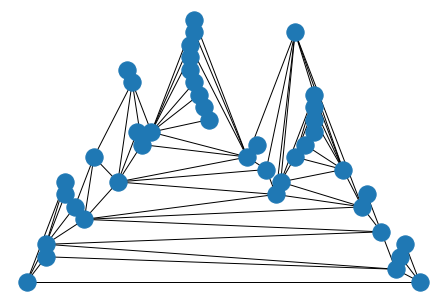

In [18]:
nx.draw_planar(G)

In [19]:
from pyvis.network import Network

net = Network("1080px", "1080px",notebook = True)
net.from_nx(G)
#net.show("NET.html")

## 1-b Task

#### Task description: Find |𝑉|, |𝐸|, 𝛿(G), Δ(G), rad(G), diam(G), girth(G), center(G), 𝜅(G), 𝜆(G).

##### Definitions:

Degree - In graph theory, the degree (or valency) of a vertex of a graph is the number of edges that are incident to the vertex.

The eccentricity e(v) of a vertex v is the greatest distance between v and any other vertex.

1)𝛿(G) - max degree of nodes.

2)Δ(G) - min degree of nodes.

3)The radius r of a graph is the minimum eccentricity of any vertex

4)The diameter d of a graph is the maximum eccentricity of any vertex in the graph

5)Girth(G) the minimum cycle of graph

6)A central vertex in a graph of radius r is one whose eccentricity is r—that is, a vertex that achieves the radius or, equivalently, a vertex v such that e(v)=r.

In [20]:
print("|𝑉| -",G.number_of_nodes())
print("|𝐸| -",G.number_of_edges())
degree_sequence = sorted([d for n, d in G.degree()], reverse = True)
print("𝛿(G) -",max(degree_sequence))
print("Δ(G) -",min(degree_sequence))
print("rad(G) -",nx.algorithms.distance_measures.radius(G))
print("diam(G) -",nx.algorithms.distance_measures.diameter(G))
cycles = nx.minimum_cycle_basis(G)
print("girth(G) -",len(min(cycles)),":"," ".join(min(cycles)))
print("center(G) -"," ".join(nx.algorithms.distance_measures.center(G)))
print("𝜅(G) -",nx.algorithms.connectivity.node_connectivity(G))
print("𝜆(G) -",nx.algorithms.connectivity.edge_connectivity(G))

|𝑉| - 43
|𝐸| - 85
𝛿(G) - 9
Δ(G) - 1
rad(G) - 5
diam(G) - 9
girth(G) - 3 : Belgium Netherlands Germany
center(G) - Austria Hungary Slovakia Slovenia Belarus Poland Russia Ukraine Croatia
𝜅(G) - 1
𝜆(G) - 1


## 1-c Task
##### Task description: Find the minimum vertex coloring 𝑍: 𝑉 → N of G.
##### Definitions:
A vertex coloring is an assignment of colors to each vertex of a graph such that no edge connects two identically colored vertices.


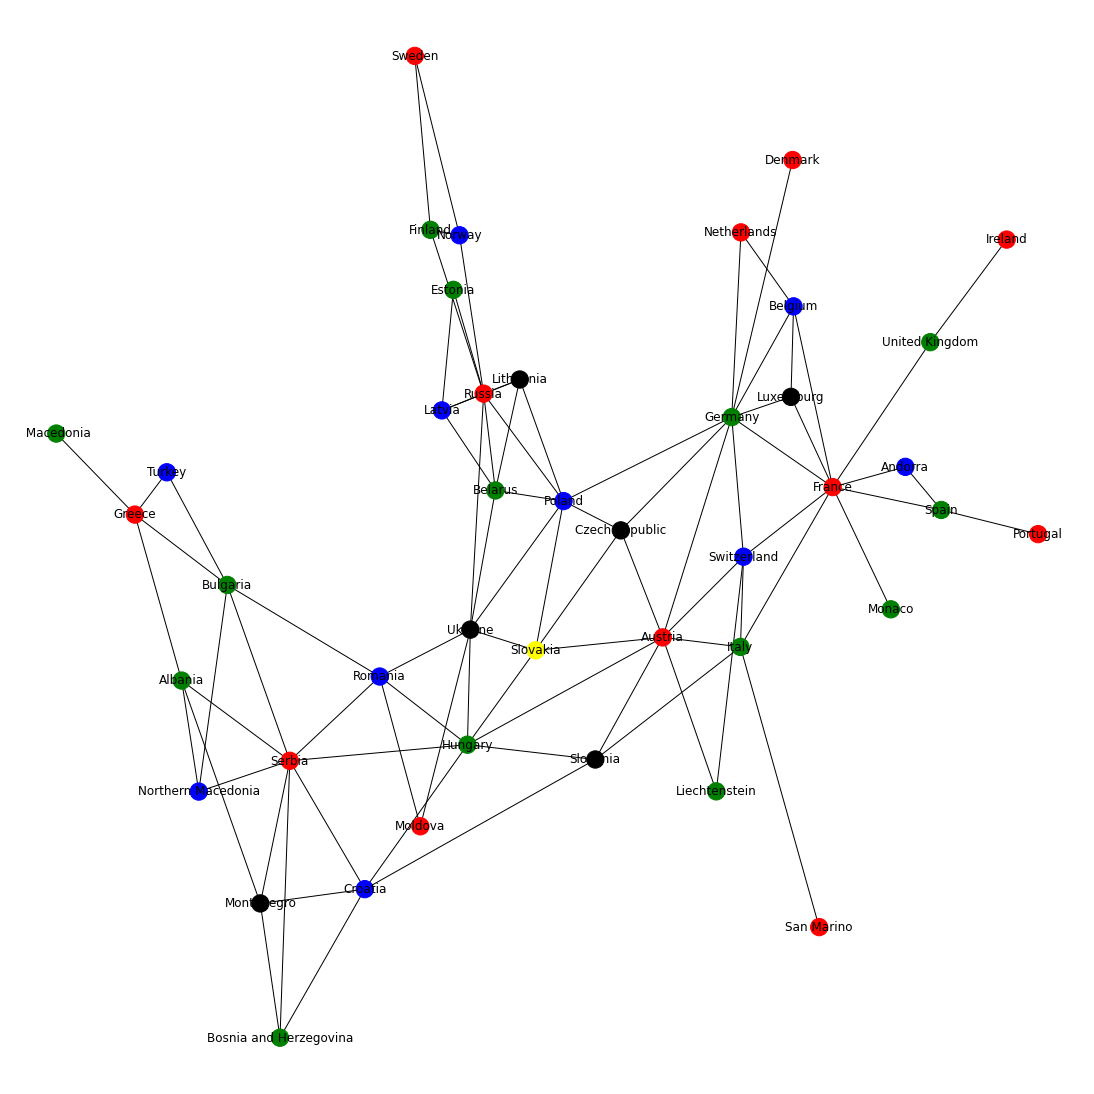

In [21]:
colors = nx.algorithms.coloring.greedy_color(G)

import matplotlib.pyplot as plt
color_map = []

for node in G:
    if colors[node]==0:
        color_map.append('red')
    elif colors[node]==1: 
        color_map.append('green')
    elif colors[node]==2: 
        color_map.append('blue')
    elif colors[node]==3: 
        color_map.append('black')
    elif colors[node]==4: 
        color_map.append('yellow')


plt.figure(3,figsize=(15,15))
pos=nx.spring_layout(G)
nx.draw(G,pos = pos,node_color = color_map, with_labels = True)
plt.savefig("color_map.png")
plt.show()

## 1-d Task
##### Task description: Find the minimum edge coloring 𝑋: 𝐸 → N of G.
##### Definitions:
A vertex coloring is an assignment of colors to each vertex of a graph such that no edge connects two identically colored vertices.


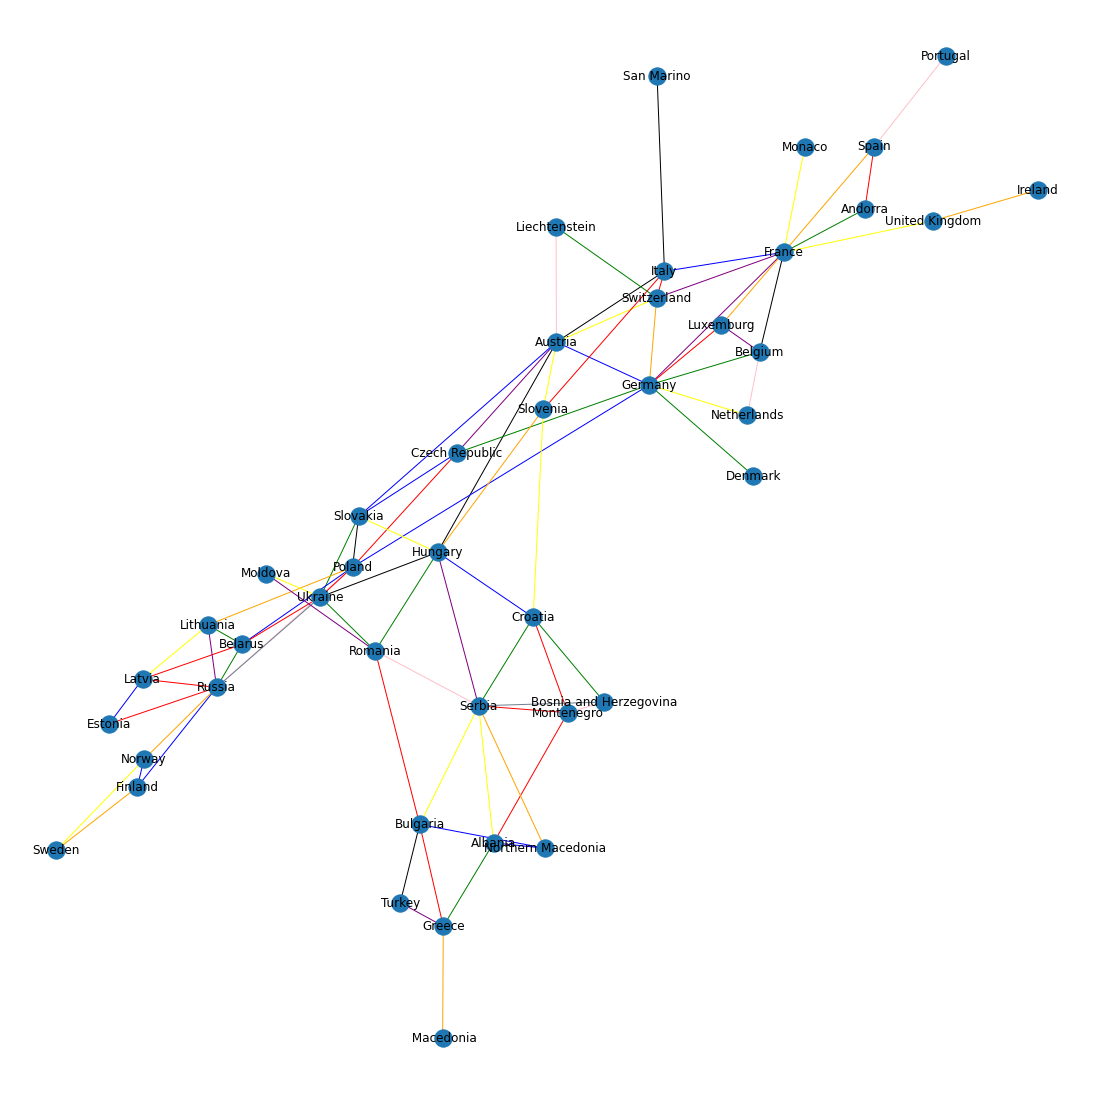

Minimum number of colors for edge coloring is 9

{'France': 0, 'Germany': 1, 'Serbia': 0, 'Austria': 0, 'Russia': 0, 'Hungary': 1, 'Poland': 2, 'Ukraine': 3, 'Italy': 1, 'Slovakia': 4, 'Switzerland': 2, 'Belarus': 1, 'Croatia': 2, 'Bulgaria': 1, 'Romania': 2, 'Albania': 1, 'Greece': 0, 'Montenegro': 3, 'Czech Republic': 3, 'Slovenia': 3, 'Latvia': 2, 'Lithuania': 3, 'Belgium': 2, 'Northern Macedonia': 2, 'Spain': 1, 'Luxemburg': 3, 'Bosnia and Herzegovina': 1, 'Finland': 1, 'Norway': 2, 'Andorra': 2, 'Liechtenstein': 1, 'Netherlands': 0, 'Turkey': 2, 'Estonia': 1, 'Sweden': 0, 'United Kingdom': 1, 'Moldova': 0, 'Denmark': 0, 'Monaco': 1, ' Macedonia': 1, 'Ireland': 0, 'San Marino': 0, 'Portugal': 0}


In [30]:
colors = nx.greedy_color(nx.line_graph(G))
color_map = []

for edge in G.edges:
    if (edge in colors):
        if colors[(edge)]==0:
            color_map.append('red')
        elif colors[edge]==1: 
            color_map.append('green')
        elif colors[edge]==2: 
            color_map.append('blue')
        elif colors[edge]==3: 
            color_map.append('black')
        elif colors[edge]==4: 
            color_map.append('yellow')
        elif colors[edge]==5:
            color_map.append('orange')
        elif colors[edge]==6:
            color_map.append("pink")
        elif colors[edge]==7:
            color_map.append("purple")
        elif colors[edge]==8:
            color_map.append("slategrey")
        

plt.figure(3,figsize=(15,15))
pos=nx.spring_layout(G)
nx.draw(G,pos = pos,edge_color = color_map, with_labels = True)
plt.savefig("color_map.png")
plt.show()

print("Minimum number of colors for edge coloring is", max(nx.greedy_color(nx.line_graph(G)).values())+1)
print()
print(nx.greedy_color(G))

## 1-e Task
##### Task description: Find the maximum clique 𝑄 ⊆ 𝑉 of G.
##### Definitions:
A clique of a graph G is an induced subgraph of G that is complete.


In [17]:
from networkx.algorithms import approximation
cliq =  approximation.max_clique(G)

B = nx.Graph()
for node in cliq:
    B.add_node(node)
    
for first_edge in cliq:
    for second_edge in cliq:
        if (first_edge!=second_edge):
            B.add_edge(first_edge,second_edge)

net2 = Network("1080px", "1080px",notebook = True)
net2.from_nx(B)
#net2.show("nr.html")

In [20]:
from networkx.algorithms import approximation

stable_set = approximation.maximum_independent_set(G)
stable_set

{'Albania',
 'Andorra',
 'Austria',
 'Belarus',
 'Belgium',
 'Bosnia and Herzegovina',
 'Bulgaria',
 'Denmark',
 'Estonia',
 'Finland',
 'Luxembourg',
 'Moldova',
 'Monaco',
 'Portugal',
 'San Marino',
 'United Kingdom'}

In [99]:
namings = {}
B = nx.Graph()
cnt= 0 
for edge in adjacency_list:
    if (edge.first_vert in namings)==0:
      #  print(first_vert,"\n")
        namings.update({edge.first_vert:cnt})
        cnt+=1
    elif (edge.second_vert in namings)==0:
        namings.update({edge.second_vert:cnt})
        cnt+=1
        
new_kost = []

for first_node, second_node,weight in kost:
    new_kost.append([first_node,second_node,{"weight":int(weight["weight"])}])

B.add_edges_from(new_kost)

max_match = nx.algorithms.matching.max_weight_matching(B,False,weight= "weight")
max_match

{('Andorra', 'France'),
 ('Austria', 'Liechtenstein'),
 ('Bulgaria', 'Turkey'),
 ('Croatia', 'Montenegro'),
 ('Estonia', 'Latvia'),
 ('Germany', 'Luxembourg'),
 ('Ireland', 'United Kingdom'),
 ('Lithuania', 'Belarus'),
 ('Luxemburg', 'Belgium'),
 ('Moldova', 'Romania'),
 ('Northern Macedonia', 'Greece'),
 ('Norway', 'Russia'),
 ('Poland', 'Czech Republic'),
 ('Serbia', 'Albania'),
 ('Slovakia', 'Ukraine'),
 ('Slovenia', 'Hungary'),
 ('Spain', 'Portugal'),
 ('Sweden', 'Finland'),
 ('Switzerland', 'Italy')}

In [60]:
min_vertex_cover = approximation.min_weighted_vertex_cover(B,weight= "weight")


In [62]:
min_edge = nx.algorithms.covering.min_edge_cover(B)
min_edge

{('Andorra', 'France'),
 ('Austria', 'Slovenia'),
 ('Belgium', 'Netherlands'),
 ('Bulgaria', 'Turkey'),
 ('Croatia', 'Hungary'),
 ('Denmark', 'Germany'),
 ('Estonia', 'Latvia'),
 ('France', 'Monaco'),
 ('Germany', 'Denmark'),
 ('Germany', 'Luxembourg'),
 ('Ireland', 'United Kingdom'),
 ('Lithuania', 'Belarus'),
 ('Luxemburg', 'Belgium'),
 ('Moldova', 'Romania'),
 ('Monaco', 'France'),
 ('Montenegro', 'Bosnia and Herzegovina'),
 ('Netherlands', 'Belgium'),
 ('Northern Macedonia', 'Greece'),
 ('Norway', 'Russia'),
 ('Poland', 'Czech Republic'),
 ('San Marino', 'Italy'),
 ('Serbia', 'Albania'),
 ('Slovakia', 'Ukraine'),
 ('Spain', 'Portugal'),
 ('Sweden', 'Finland'),
 ('Switzerland', 'Liechtenstein')}

In [63]:
path = nx.algorithms.euler.eulerize(B)
print(list(nx.algorithms.euler.eulerian_path(path)))

[('Albania', 'Serbia'), ('Serbia', 'Romania'), ('Romania', 'Bulgaria'), ('Bulgaria', 'Romania'), ('Romania', 'Moldova'), ('Moldova', 'Ukraine'), ('Ukraine', 'Russia'), ('Russia', 'Norway'), ('Norway', 'Sweden'), ('Sweden', 'Finland'), ('Finland', 'Norway'), ('Norway', 'Finland'), ('Finland', 'Russia'), ('Russia', 'Poland'), ('Poland', 'Ukraine'), ('Ukraine', 'Belarus'), ('Belarus', 'Poland'), ('Poland', 'Lithuania'), ('Lithuania', 'Russia'), ('Russia', 'Latvia'), ('Latvia', 'Lithuania'), ('Lithuania', 'Belarus'), ('Belarus', 'Russia'), ('Russia', 'Estonia'), ('Estonia', 'Latvia'), ('Latvia', 'Belarus'), ('Belarus', 'Ukraine'), ('Ukraine', 'Romania'), ('Romania', 'Hungary'), ('Hungary', 'Ukraine'), ('Ukraine', 'Slovakia'), ('Slovakia', 'Poland'), ('Poland', 'Slovakia'), ('Slovakia', 'Hungary'), ('Hungary', 'Slovenia'), ('Slovenia', 'Italy'), ('Italy', 'San Marino'), ('San Marino', 'Italy'), ('Italy', 'Switzerland'), ('Switzerland', 'Germany'), ('Germany', 'Poland'), ('Poland', 'Czech Re

In [67]:
komp = nx.algorithms.approximation.kcomponents.k_components(B,2)
#komp

In [72]:
komp_edge = list(nx.algorithms.connectivity.edge_kcomponents.k_edge_components(G, 2))
#komp_edge

In [81]:
need_to_draw_tree = nx.algorithms.components.biconnected_components(B)
max_len = 0
max_elem = {}
for elem in need_to_draw_tree:
    if len(elem)>max_len:
        max_len = len(elem)
        max_elem = elem
print(max_elem)

{'Slovenia', 'Liechtenstein', 'Northern Macedonia', 'Moldova', 'Montenegro', 'Slovakia', 'Bosnia and Herzegovina', 'Lithuania', 'Serbia', 'Greece', 'Ukraine', 'Switzerland', 'Germany', 'Bulgaria', 'Poland', 'Italy', 'Russia', 'Croatia', 'Austria', 'Turkey', 'Netherlands', 'Albania', 'Hungary', 'Luxembourg', 'Estonia', 'Latvia', 'Czech Republic', 'France', 'Belgium', 'Romania', 'Belarus'}


In [100]:
namings = {}
C = nx.Graph()
        
new_kost3 = []

for first_node, second_node,weight in kost:
    new_kost3.append([first_node,second_node,int(weight["weight"])])

C.add_weighted_edges_from(new_kost3)


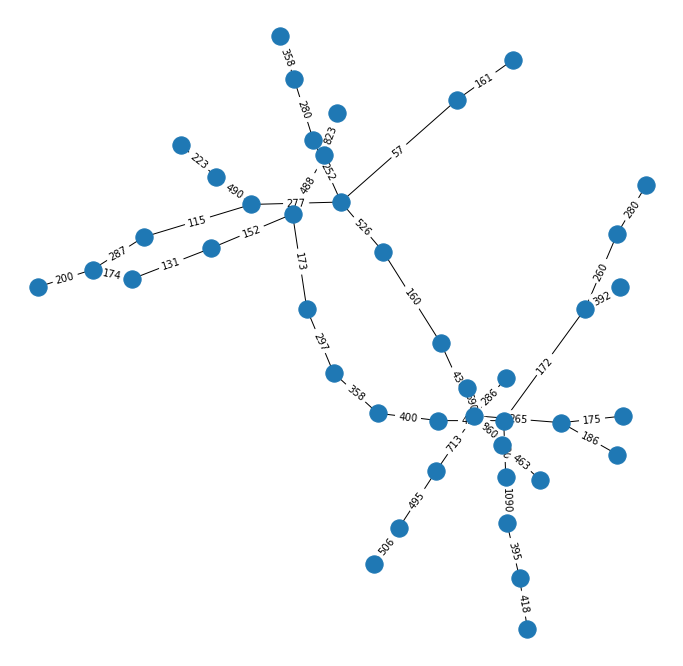

In [165]:
#я пытался сделать это адекватно, но у меня не вышло, поэтому держи два возможных отображения
min_tree = nx.algorithms.tree.mst.minimum_spanning_tree(C)
net3 = Network("1080px", "1080px",notebook = True)
pos=nx.spring_layout(min_tree) 
labels1 = nx.get_edge_attributes(min_tree,'weight')
labels = nx.get_node_attributes(min_tree,"node")
plt.figure(3,figsize=(12,12)) 
nx.draw_networkx_edge_labels(min_tree,pos,edge_labels=labels)
nx.draw_networkx_edge_labels(min_tree,pos,edge_labels=labels1 )
plt.figure(3,figsize=(5,5)) 
nx.draw(min_tree,pos)
plt.show()
net3.from_nx(min_tree)
            
#net3.show("tree.html")

In [168]:
cnt= 0 
for edge in adjacency_list:
    if (edge.first_vert in namings)==0:
      #  print(first_vert,"\n")
        namings.update({edge.first_vert:cnt})
        cnt+=1
    elif (edge.second_vert in namings)==0:
        namings.update({edge.second_vert:cnt})
        cnt+=1

new_kost4 = []

for first_node, second_node,weight in kost:
    new_kost4.append([namings[first_node],namings[second_node],{"weight":int(weight["weight"])}])

H = nx.Graph()
H.add_edges_from(new_kost4)
H.edges

EdgeView([(0, 36), (0, 1), (0, 2), (0, 3), (36, 24), (36, 2), (36, 26), (1, 23), (1, 27), (1, 3), (2, 24), (2, 3), (3, 23), (3, 24), (3, 27), (3, 8), (3, 25), (4, 20), (4, 5), (20, 19), (20, 7), (20, 9), (20, 33), (20, 34), (20, 5), (20, 13), (20, 35), (5, 42), (6, 28), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (6, 12), (6, 13), (28, 7), (28, 16), (28, 11), (7, 19), (7, 29), (7, 33), (7, 22), (7, 16), (7, 13), (8, 27), (8, 11), (8, 12), (8, 18), (8, 25), (9, 38), (9, 12), (9, 13), (10, 13), (11, 16), (11, 18), (12, 27), (14, 39), (14, 15), (14, 16), (14, 17), (14, 18), (39, 30), (39, 15), (39, 17), (15, 16), (15, 17), (16, 17), (16, 18), (17, 30), (17, 31), (17, 41), (17, 18), (18, 40), (18, 25), (19, 21), (19, 22), (23, 27), (24, 25), (24, 26), (25, 40), (31, 41), (31, 32), (41, 32), (35, 37)])